<a href="https://colab.research.google.com/github/LucasCapSilva/-JwtWithPermissionRole/blob/master/BacterDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BacterDetect

## Classificador de bacterias gram negativas e gram positivas

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import zipfile
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0-rc3'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
path = "/content/drive/My Drive/tensorflow/bacteria funcionando.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

# Etapa 2: Transfer learning e reuso do modelo

In [0]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

In [0]:
base_model.summary()

In [0]:
x = base_model.output

In [0]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [0]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [0]:
model.summary()

In [0]:
for layer in model.layers[:175]:
  layer.trainable = False

In [0]:
for layer in model.layers[175:]:
  layer.trainable = True

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [0]:
train_generator = train_datagen.flow_from_directory('/content/bacteria funcionando/train',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 35,
                                                    class_mode = 'categorical',
                                                    shuffle = True)
valid_generator = train_datagen.flow_from_directory('/content/bacteria/train',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 35,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 312 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator,
                              epochs = 10,validation_data=valid_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 9 steps, validate for 8 steps
Epoch 1/10
9/9 [==============================] - 9s 967ms/step - loss: 1.0614 - accuracy: 0.6795 - val_loss: 0.4823 - val_accuracy: 0.7024
Epoch 2/10
9/9 [==============================] - 5s 556ms/step - loss: 0.3142 - accuracy: 0.9103 - val_loss: 1.4322 - val_accuracy: 0.5238
Epoch 3/10
9/9 [==============================] - 5s 565ms/step - loss: 0.1730 - accuracy: 0.9359 - val_loss: 0.1161 - val_accuracy: 0.9683
Epoch 4/10
9/9 [==============================] - 5s 575ms/step - loss: 0.0510 - accuracy: 0.9808 - val_loss: 0.2356 - val_accuracy: 0.9087
Epoch 5/10
9/9 [==============================] - 5s 576ms/step - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.5336 - val_accuracy: 0.7778
Epoch 6/10
9/9 [==============================] - 5s 572ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9722
Epoch 7/10
9/9 [==============================] - 5s 556ms/step - loss

# Etapa 3: Avaliação do modelo

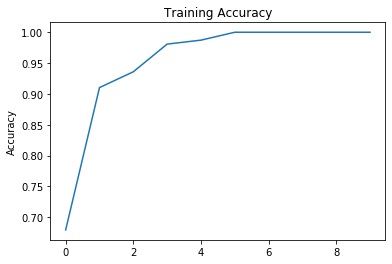

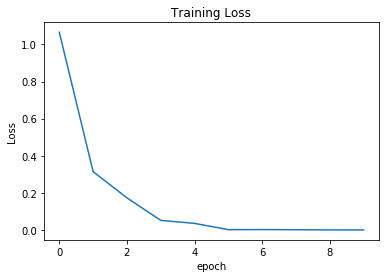

In [0]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

# Etapa 4: teste com imagem

In [0]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Gram-stain-of-a-urine-specimen-with-Klebsiella-pneumonia-The-Gram-stain-of-a-positive.png', target_size=(224,224))

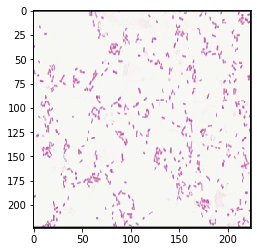

In [0]:
plt.imshow(sample_image)

In [0]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
np.shape(sample_image)

(224, 224, 3)

In [0]:
sample_image = np.expand_dims(sample_image, axis = 0)
np.shape(sample_image)

(1, 224, 224, 3)

In [0]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [0]:
predictions = model.predict(sample_image)
print(predictions)

[[0.5842148  0.41578522]]


In [0]:
classes=['gram negativo','gram positvo']

In [0]:
classes[np.argmax(predictions[0])]

'gram negativo'

# Etapa 5: Deploy do modelo

In [0]:
model_json = model.to_json()
with open("BacterDetect.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights("BacterDetect.h5")